# Информация о проекте и данных

**Таблица books**.  
Содержит данные о книгах:
- book_id — идентификатор книги;
- author_id — идентификатор автора;
- title — название книги;
- num_pages — количество страниц;
- publication_date — дата публикации книги;
- publisher_id — идентификатор издателя.

**Таблица authors**.  
Содержит данные об авторах:
- author_id — идентификатор автора;
- author — имя автора.

**Таблица publishers**.  
Содержит данные об издательствах:
- publisher_id — идентификатор издательства;
- publisher — название издательства;

**Таблица ratings**.  
Содержит данные о пользовательских оценках книг:
- rating_id — идентификатор оценки;
- book_id — идентификатор книги;
- username — имя пользователя, оставившего оценку;
- rating — оценка книги.

**Таблица reviews**.    
Содержит данные о пользовательских обзорах на книги:
- review_id — идентификатор обзора;
- book_id — идентификатор книги;
- username — имя пользователя, написавшего обзор;
- text — текст обзора.

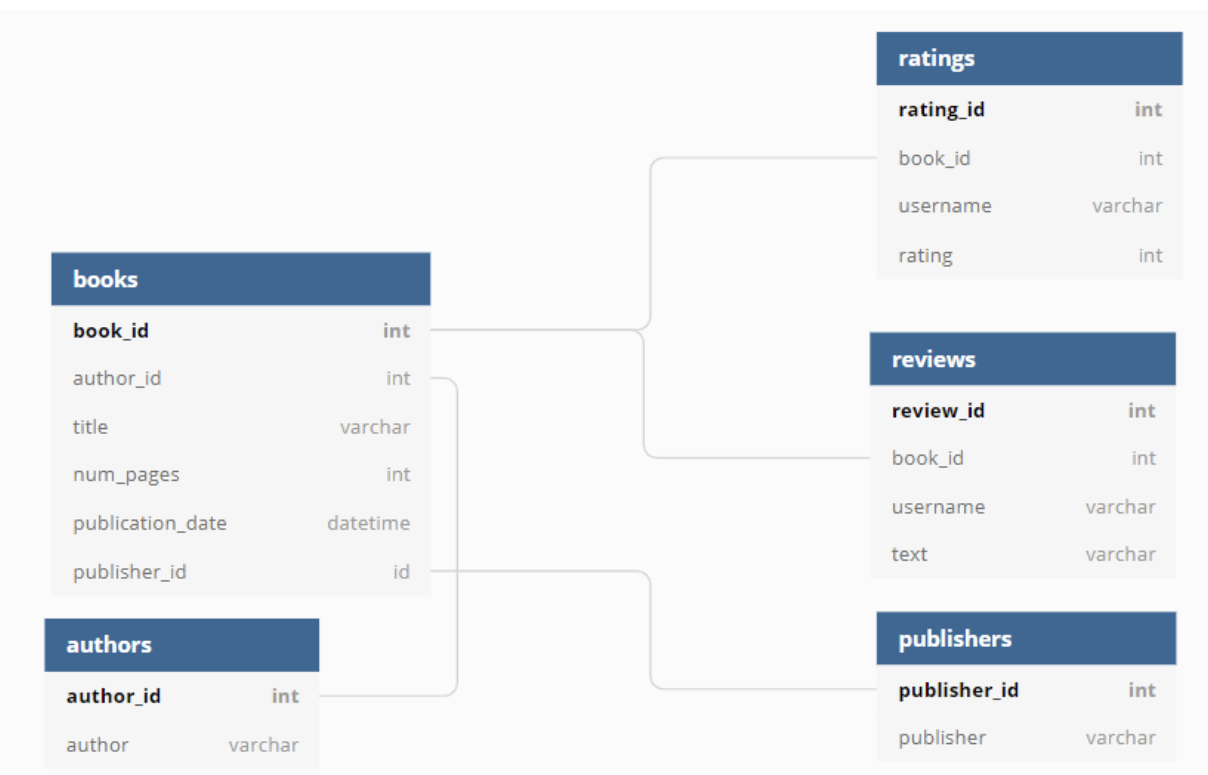

Как выполнить задание?
- Опишите цели исследования;
- Исследуйте таблицы — выведите первые строки, посчитайте количество строк
в каждой таблице;
- Сделайте по одному SQL-запросу для решения каждого задания;
- Выведите результат каждого запроса в тетрадке;
- Опишите выводы по каждой из решённых задач.

Ваша компания купила крупный сервис для чтения книг по подписке.
Необходимо изучить базу данных. Эти данные помогут сформулировать ценностное предложение для нового продукта

# Подключение базы данных

In [ ]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

In [ ]:
# устанавливаем параметры
db_config = {
             'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db' # название базы данных
            }
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})

# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
  '''Открываем соединение, получаем данные из sql, закрываем соединение'''
  with engine.connect() as con:
    return pd.read_sql(sql=sa.text(query), con = con)

In [ ]:
# формируем запрос и выводим данные
query = '''SELECT * FROM books LIMIT 5'''
get_sql_data(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


# Посмотрим на базу данных

## Books

In [ ]:
# формируем запрос и выводим данные
books = (
    '''
    SELECT *
    From books
    '''
)

get_sql_data(books)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


In [ ]:
# Посмотрим сколько книг есть
count_of_books = (
    '''
    SELECT count(distinct(book_id))
    From books
    '''
)

get_sql_data(count_of_books)

,count
0,1000


In [ ]:
# Посмотрим сколько книг есть
years_of_books = (
    '''
    SELECT distinct extract(year from publication_date::date) as year,
           count(distinct(book_id))
    From books
    Group by year
    Order by 1
    '''
)

get_sql_data(years_of_books)

,year,count
0,1952.0,1
1,1977.0,1
2,1980.0,2
3,1982.0,5
4,1983.0,1
5,1984.0,1
6,1986.0,2
7,1987.0,7
8,1988.0,5
9,1989.0,5


У нас есть 1000 книг в базе данных Books. Представленная информация по ним:
 - Название
 - Количество страниц
 - Дата выхода
 - Есть связи с данными по авторам, отзывам, рейтингов и изданий

 Книги достаточно старые. По большей части тут релизы 2003-2006 годов.

## Издатели

In [ ]:
# формируем запрос и выводим данные
publ = (
    '''
    SELECT *
    From publishers
    '''
)

get_sql_data(publ)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


In [ ]:
# формируем запрос и выводим данные
count_of_publ = (
    '''
    SELECT count(distinct(publisher))
    From publishers
    '''
)

get_sql_data(count_of_publ)

,count
0,340


Представлены данные о 340 издателей. Эта база данных является справчником

## Авторы

In [ ]:
# формируем запрос и выводим данные
author = (
    '''
    SELECT *
    From authors
    '''
)

get_sql_data(author)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


In [ ]:
# формируем запрос и выводим данные
count_of_author = (
    '''
    SELECT count(distinct(author))
    From authors
    '''
)

get_sql_data(count_of_author)

,count
0,636


Представлены данные по 636 авторам. Эта база данных является справчником

## Отзывы

In [ ]:
# формируем запрос и выводим данные
reviews = (
    '''
    SELECT *
    From reviews
    '''
)

get_sql_data(reviews)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


In [ ]:
# формируем запрос и выводим данные
count_of_reviewers = (
    '''
    SELECT count(distinct(username))
    From reviews
    '''
)

get_sql_data(count_of_reviewers)

,count
0,160


Данная база данных представляет собой информацию от 160 пользователей, где они делятся мнениями о книгах. Всего они написали 2793 отзывов

## Рейтинги

In [ ]:
# формируем запрос и выводим данные
ratings = (
    '''
    SELECT *
    From ratings
    '''
)

get_sql_data(ratings)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


In [ ]:
# формируем запрос и выводим данные
count_of_users = (
    '''
    SELECT count(distinct(username))
    From ratings
    '''
)

get_sql_data(count_of_users)

,count
0,160


In [ ]:
# формируем запрос и выводим данные
avg_rating = (
    '''
    SELECT round(avg(rating), 2)
    From ratings
    '''
)

get_sql_data(avg_rating)

,round
0,3.93


Данная база данных представляет собой информацию от 160 пользователей, где они делятся cвоими оценками книг. Было поставлено 6456 оценок 1000 книгам.    

Средняя оценка это 3.93

# Задания
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще
50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок.

Посчитайте, сколько книг вышло после 1 января 2000 года

In [ ]:
# формируем запрос и выводим данные
task_1 = (
    '''
    SELECT count(title)
    FROM books
    Where publication_date >= '2000-01-01'
    '''
)

get_sql_data(task_1)

,count
0,821


Мы имеем 821 книга вышедших после 1 января 2000

Для каждой книги посчитайте количество обзоров и среднюю оценку

In [ ]:
# формируем запрос и выводим данные
task_2 = (
    '''
    SELECT distinct b.title as title,
           count(distinct r.review_id) as count_of_reviews,
           round(avg(ra.rating), 2) as avg_rating
    FROM books as b
    Left join reviews as r on r.book_id = b.book_id
    Left join ratings as ra on ra.book_id = b.book_id
    Group by title
    order by 2 desc, 3
    '''
)
get_sql_data(task_2)

,title,count_of_reviews,avg_rating
0,Memoirs of a Geisha,8,4.14
1,Twilight (Twilight #1),7,3.66
2,Eat Pray Love,6,3.40
3,The Giver (The Giver #1),6,3.75
4,The Road,6,3.77
...,...,...,...
994,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
995,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,Essential Tales and Poems,0,4.00
997,Leonardo's Notebooks,0,4.00


Выведены данные по топ-10 названию книги, количеству отзывов и среднему рейтингу книги. Сортировка на большее количество отзывов и средний рейтинг

Определите издательство, которое выпустило наибольшее число книг толще
50 страниц — так вы исключите из анализа брошюры

In [ ]:
# формируем запрос и выводим данные
task_3 = (
    '''
    Select distinct p.publisher as publisher,
           count(b.book_id) as count_of_books
    From books as b
    Left join publishers as p on p.publisher_id = b.publisher_id
    where b.book_id in (SELECT book_id
                        FROM books
                        Where num_pages > 50)
    Group by publisher
    Order by 2 desc
    Limit 1
    '''
)
get_sql_data(task_3)

,publisher,count_of_books
0,Penguin Books,42


Penguin Books выпустил больше всего книг от 50 страниц

Определите автора с самой высокой средней оценкой книг — учитывайте
только книги с 50 и более оценками

In [ ]:
# формируем запрос и выводим данные
task_4 = (
    '''
    With t_4 as (SELECT a.author,
                        b.book_id,
                        count(ra.rating_id)
                 FROM books as b
                 Left join ratings as ra on ra.book_id = b.book_id
                 Left join authors as a on a.author_id = b.author_id
                 Group by 1, 2
                 Having count(ra.rating_id) >= 50)

    SELECT distinct a.author,
           round(avg(rating), 2) as avg_rat
    FROM books as b
    Left join ratings as ra on ra.book_id = b.book_id
    Left join authors as a on a.author_id = b.author_id
    Where b.book_id in (Select book_id From t_4)
    Group by a.author
    Order by 2 desc
    Limit 1
    '''
)
get_sql_data(task_4)

,author,avg_rat
0,J.K. Rowling/Mary GrandPré,4.2871


Автор с наибольшим рейтингом, только по книгам, которые набрали больше 50 отзывов, это JK Rowling/Mary GrandPre с результатом 4.29

Посчитайте среднее количество обзоров от пользователей, которые поставили
больше 48 оценок

In [ ]:
# формируем запрос и выводим данные
task_5 = (
    '''
    with t_5 as (
    SELECT distinct(username)
    FROM ratings
    Group by username
    Having count(rating_id) > 48),

    t_5_1 as
    (SELECT distinct username,
           count(review_id)
    FROM reviews
    where username in (select * from t_5)
    group by username)

    Select avg(count) as avg_count_reviews
    From t_5_1
    '''
)
get_sql_data(task_5)

,avg_count_reviews
0,24.0


Пользователи, которые поставили более 48 оценок, в среднем ставят 24 обзоров.

# Итоговый вывод

Мы имеем базу данных книг. Были проанализированы имеющиеся данные.    

У нас есть 1000 книг, от 636 авторов и от 340 издаталей.  

Большая часть книг из нулевых годов. Библиотека довольна таки старая  

Были выполнены 5 запросов:
- Сколько книг вышло после 1 января 2000
- Для каждой книги было посчитано количество отзывов и средний рейтинг
- Найдено издание, которое выпустило больше всего книг
- Найден автор с наилучшим рейтингом, учитывая только книги от 50 отзывов
- Посчитано сколько в среднем обзоров ставят пользователи, которые ставили более 48 оценок на книги